# Phys 512: Homework 2

## 1.Integration errors

### a)
 

It is possible to derive analytical expressions for the errors in the different approximations, which are known as the Euler-Maclaurin formulae.

$$\epsilon_{Trapezoidal}= \frac{1}{12} \left(\Delta x\right)^2 \left [ f'(a)-f'(b)\right ]$$

$$\epsilon_{Simpson}= \frac{1}{180} \left(\Delta x\right)^4 \left[f'''(a)-f'''(b)\right]$$

By examining these expressions, it becomes evident that they exhibit a dependence on powers of $\Delta x$.

To begin, let's consider the Maclaurin formula, which states that an integral $I$ can be approximated by a sum $S$:

$$I= \int_{a}^{b} f(x) dx $$

$$S = f(a+1)+\ldots + f(b_1)+f(b)$$

Certainly, the difference between them can be expressed as:

$$S-I = \sum_{k=1}^{p}\frac{B_K}{k!} \left(f^{(k-1)}(b)-f^{(k-1)}(a)\right) + R_p$$

This relationship provides a way to approximate a finite integral, as shown in the following expression:

$$I = \int_{a}^b f(x) dx \approx \Delta x\left(\frac{f_{x_1}}{2}\right) + f(x_2)+ \ldots + f(x_{N-1}) + \frac{f(x_N)}{2}+ \frac{\Delta x^2}{12}(f'(x_1)-f'(x_N))-\frac{\Delta x^4}{720}(f'''(x_1)-f'''(x_N)) + \ldots$$

This equation allows us to return to the analytical equations for the error we discussed at the beginning.

A more natural way to think of it is that when we expand the functions we want to integrate into Taylor Series and subtract the approximation made by the trapezoidal or Simpson's method, we are left with the higher-order terms of the Taylor expansions, which are of the order $O(\Delta x^2)$ and $O(\Delta x^4)$. (Of course, the error is defined as the difference between the original function and the approximated one.) For the trapezoidal method, this is sufficient to explain why the error scales as $\Delta x^2$. However, in the case of Simpson's method, we need to consider that because of the way it was constructed using double intervals, the third-order term is antisymmetric over the double interval and cancels out. This means that when expressing the approximate integral, we are left with a term of the order of $\Delta x^3$. So the error would be at the order of $O(\Delta x^3)$.



### b)
First of all, the errors associated with the trapezoidal rule and Simpson’s rule scale as $\propto (\Delta x)^2$ and $\propto (\Delta x)^4$. This implies that if we double the spacing, i.e., $\Delta x \rightarrow 2\Delta x$, the new error would be proportional to $\propto (2\Delta x)^2 = 4\cdot (\Delta x)^2$ for the trapezoidal rule and $\propto (2\Delta x)^4 = 16\cdot (\Delta x)^4$ for Simpson’s rule.

Using the hint, we will express the true value of the integral as $I = I_1 + \epsilon_1 = I_2 + \epsilon_2$. Let's substitute the value for the error in $I_2$ for each case:
 
 $$\text{Trapezoidal rule:} \quad I_1 +\epsilon_1 = I_2 +\epsilon_2 \rightarrow I_1 +\epsilon_1 = I_2+4\cdot\epsilon_1 \rightarrow I_1-I_2 = 3\cdot\epsilon_1 \rightarrow \boxed{\epsilon_1 = \frac{I_1-I_2}{3}}$$
 
  $$\text{Simpson's rule:} \quad I_1 +\epsilon_1 = I_2 +\epsilon_2 \rightarrow I_1 +\epsilon_1 = I_2+16\cdot\epsilon_1\rightarrow I_1-I_2 = 15\cdot\epsilon_1 \rightarrow \boxed{\epsilon_1 = \frac{I_1-I_2}{15}}$$

### c)

Let's import and plot the data given by the heading, just to have a better idea of what we are facing.

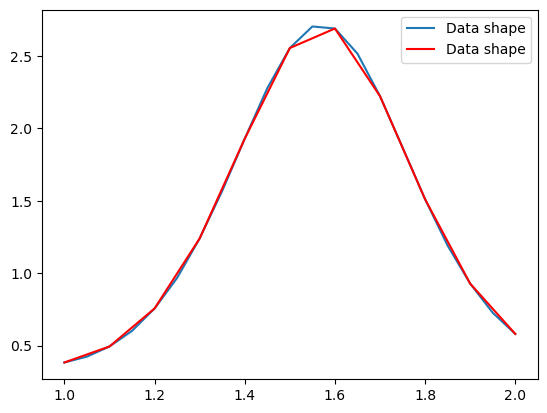

Using Trapezoidal rule we get that I_1 is 1.48235 with error 0.000615788; but using Simpson's rule  I_1 is 1.48297 with error 4.37991e-06


In [9]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

txt = open("hw2_data.txt", "r")

data = np.loadtxt(txt)

x1 = np.array([])
f1x = np.array([])

for i in data:
    x1 = np.append(x1, i[0])
    f1x = np.append(f1x, i[1])
    
x2 = x1[0:-1:2]
f2x = f1x[0:-1:2]

x2 = np.append(x2, x1[-1])
f2x = np.append(f2x, f1x[-1])

plt.plot(x1,f1x, label = 'Data shape')
plt.plot(x2,f2x, color = 'r', label = 'Data shape')
plt.legend()
plt.show()

#We are going to use the Simpson's rule.

I1t = scipy.integrate.trapezoid(f1x,x1)
I2t = scipy.integrate.trapezoid(f2x,x2)

I1s = scipy.integrate.simpson(f1x,x1)
I2s = scipy.integrate.simpson(f2x,x2)

#Applying the previous procedure to estimate the error in I1:

e1t = (I1t-I2t)/3
e1s = (I1s-I2s)/15


print("Using Trapezoidal rule we get that I_1 is %lg with error %lg; but using Simpson's rule  I_1 is %lg with error %lg" %(I1t, e1t,I1s,e1s))


We have considered 11 points, including the first and the last ones. We can observe that the Trapezoidal rule has a significantly larger error compared to Simpson's rule. Even with such rough approximations and a low number of points, Simpson's rule is only halfway to the roundoff error.

### d)


In [10]:
I0 = 1.482974344768713

E1t= abs(I1t-I0)
E1s = abs(I1s-I0)

print("The true error for the tramezoidal rule is %lg; for Simpson's rule is %lg" %(E1t,E1s))


The true error for the tramezoidal rule is 0.000619616; for Simpson's rule is 3.82741e-06


The relative differences between the error estimation and its actual value are more pronounced for Simpson's rule. Nevertheless, it's important to note that this value was already quite small from the beginning. 

The estimation is lower for the Trapezoidal rule, whereas it is larger for Simpson's rule. Overall, the error estimation is reasonably accurate, aligning with the order of magnitude.

## 2.Chemical potential of a Fermi gas

### a)

$$N = V\int_{0}^{\infty} \frac{8\pi p^2 dp}{h^3}\frac{1}{1+e^{(\epsilon-\mu)/k_BT}}$$

and $p = \sqrt{2m\epsilon}$

Let's rearange this integral. First of all we will use the aproximation to non-relativistic particles $dp = \frac{m}{\sqrt{2m\epsilon}}d\epsilon$ thtat yields to

$$N = V\int_{0}^{\infty} \frac{16\pi m^2 \epsilon}{h^3 \sqrt{2m\epsilon}} \frac{1}{1+e^{(\epsilon-\mu)/k_BT}} d\epsilon$$

Now let's use the hint as $x = \epsilon/k_B T \rightarrow dx k_B T = d\epsilon$ and

$$N = V\int_{0}^{\infty} \frac{4\pi }{h^3} \frac{4m^2 k_B^2T^2}{\sqrt{2 m k_B T}} \frac{x}{\sqrt{x}} \frac{1}{1+e^{x-\mu/k_BT}} dx $$

$$ N = V\int_{0}^{\infty} \frac{4\pi}{h^3}  \left (2 m k_B T\right)^{3/2} \sqrt{x} \frac{1}{1+e^{x-\mu/k_BT}} dx \rightarrow  V\int_{0}^{\infty} \left (\frac{ m k_B T}{2\pi\hbar^2}\right)^{3/2} \frac{4}{\sqrt{\pi}} \sqrt{x} \frac{1}{1+e^{x-\mu/k_BT}} dx $$

Finally

$$n_{reduced}  = N/(Vn_Q) = \int_{0}^{\infty} 4 \sqrt{\frac{x}{\pi}} \frac{1}{1+e^{x-\mu/k_BT}} dx = f\left(\frac{\mu}{k_BT}\right) = f(C)$$

C:\Users\Guillem\AppData\Local\Temp\ipykernel_2816\945477746.py:7: RuntimeWarning: overflow encountered in exp
  fun = 4*np.sqrt(x/np.pi)/(1+np.exp(x-C))


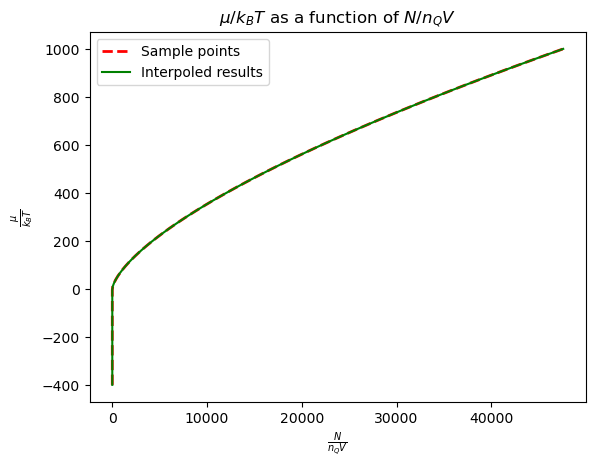

In [25]:
import numpy as np
import scipy.integrate
import scipy.interpolate
import matplotlib.pyplot as plt

def func(x,C):
    fun = 4*np.sqrt(x/np.pi)/(1+np.exp(x-C))
    return fun

n_reduced = np.array([])
C = np.linspace(-400,1000,100)

for i in C:
    I, err = scipy.integrate.quad(func, 0, np.inf, args=(i,))
    n_reduced = np.append(n_reduced, I)

interpol = scipy.interpolate.RegularGridInterpolator((n_reduced,), C)
    
plt.plot(n_reduced,C, color = 'r', label = r'Sample points', linewidth=2,  linestyle='dashed')
plt.plot(n_reduced,interpol(n_reduced), color = 'g', label = r'Interpoled results')
plt.xlabel(r'$\frac{N}{n_Q V}$')
plt.ylabel(r'$\frac{\mu}{k_B T}$')
plt.legend(loc = 'upper left')
plt.title(r'$\mu/k_BT$ as a function of $N/n_QV$')
plt.legend()
plt.show()

As expected, since we used all the sample points to generate the function, they line up almost perfectly.

### b)

The errors arise from both the integration and interpolation processes, giving us two primary sources of error.

Our approach involves the following steps:

1. Calculate $N/n_QV = f_{integral}\left(\frac{\mu}{k_BT}\right)$, where different values of $\frac{\mu}{k_BT}$ yield different values of $N/n_QV$.

2. Invert the function to find $\frac{\mu}{k_BT} = f_{interpolation}(N/n_QV)$.

Regarding the integration using the quad method, errors typically hover around $10^{-4}$ as $\frac{\mu}{k_BT}$ stabilizes when it increases. However, when we approach very small negative values, the error tends to decrease indefinitely.

As for the interpolation, it's likely that the error is around the roundoff error, since we are using all the sample points, and the precision of our computations is primarily determined by the accuracy of the integration step.

### c)

Non-degenerate: $\mu = k_B T ln\left(\frac{n}{2n_Q}\right) \rightarrow \frac{\mu}{k_BT} =  ln\left(\frac{N}{V 2n_Q}\right) \rightarrow C = ln\left(\frac{n_{reduced}}{2}\right)$

Degenerate: $\mu = \frac{\hbar^2}{2m}\left(\frac{3\pi^2N}{V}\right)^{2/3}\rightarrow \frac{\mu}{k_BT} = C = \frac{1}{4}\left(3\sqrt{\pi}n_{reduced}\right)^{2/3}$

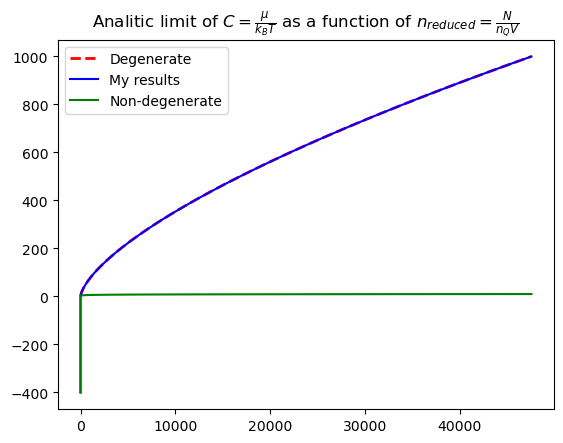

In the range of small values of N/n_QV, the Non-Degenerate limit is more accurate since the 29 number of points under 1 falls within the range $(3.83036e-174,0.034964)$.

In the range of relatively large values of N/n_QV, the Degenerate limit is more accurate since the 71 number of points under 1 falls within the range $(48.8889,47576.7)$.


In [26]:
nondege = lambda n : np.log(n/2)

dege = lambda n : ((3*np.sqrt(np.pi)*n)**(2/3))/4

plt.plot(n_reduced,dege(n_reduced), color = 'r', label = r'Degenerate', linewidth=2,  linestyle='dashed')
plt.plot(n_reduced,interpol(n_reduced), color = 'b', label = r'My results')
plt.plot(n_reduced,nondege(n_reduced), color = 'g', label = r'Non-degenerate')
plt.title(r'Analitic limit of $C = \frac{\mu}{k_BT}$ as a function of $n_{reduced}=\frac{N}{n_QV}$')
plt.legend()
plt.show()

#In which points the functions are 1% the same?

non_deg_range = np.array([])
deg_range = np.array([])

for i, n in enumerate(n_reduced):
    if abs(nondege(n_reduced)[i]-interpol(n_reduced)[i])/interpol(n_reduced)[i] < 0.01:
        non_deg_range = np.append(non_deg_range,n)
    if abs(dege(n_reduced)[i]-interpol(n_reduced)[i])/interpol(n_reduced)[i] < 0.01:
        deg_range = np.append(deg_range,n)

print("In the range of small values of N/n_QV, the Non-Degenerate limit is more accurate since the %lg number of points under 1 falls within the range $(%lg,%lg)$." % (len(non_deg_range), min(non_deg_range), max(non_deg_range)))

print("\nIn the range of relatively large values of N/n_QV, the Degenerate limit is more accurate since the %lg number of points under 1 falls within the range $(%lg,%lg)$." % (len(deg_range)-len(non_deg_range), deg_range[29], max(deg_range)))


## 3.Sampling the Maxwell-Boltzmann distribution

### a)


We will employ the rejection method for this task. While it may not be the fastest approach, it offers a straightforward way to achieve our goal. Upon reviewing the code, you'll notice that the acceptance ratio hinges on the parameter '$a$' which defines our distribution. It's also influenced by the total area covered by the points, corresponding to the actual size of the function.

For instance, if we set $a=2$ and generate data up to $x = 10$, the acceptance ratio amounts to $1/3$. Consequently, to obtain a sample of $1000000$, we actually need to generate $3000000$ original values.

To address this issue, we've imposed a limit on the $x$ values, which will be also dependent on $a$. This ensures that we avoid generating data far from the crucial regions of the function. By introducing this constraint, we significantly increase the likelihood of obtaining the desired one million samples within the primary region of the distribution.


In [11]:
import numpy as np
import matplotlib.pyplot as plt

a = 1   #  this parameter defines the value of k_B*T/m. It also controls the variance of the distribution

def MaxwellBoltzmann(N):
    Num = N*4 # with this number of samples we make sure we're going to do the enough points
    variance = np.sqrt((a**2)*(3*np.pi-8)/np.pi)  #  knowing the variance allow us to asses until which x distance we should sample
    x = np.random.default_rng().uniform(0,10*variance,Num)  #  we consider 5 times the variance a good range to sample points
    maxbol = (np.sqrt(2/np.pi))*(x**2)*np.exp(-((x/a)**2)/2)/a**3
    y = np.random.default_rng().uniform(0,max(maxbol),Num) #  the top of the function is our limit, we know any poit higher than this for sure will be rejected
    x_inside = x[y <= maxbol]
    return x_inside[0:N]

print(len(MaxwellBoltzmann(1000000)), MaxwellBoltzmann(1000000))

1000000 [2.56322851 2.05815395 2.09993967 ... 1.2382758  2.42607178 2.88338518]


By trimming the final array, we guarantee that we generate an array containing precisely one million points. Thanks to the reasonable restrictions when generating points along both the $y$ and $x$ axes, we can efficiently compute this array in less than a second for any $a$ value.

### b)

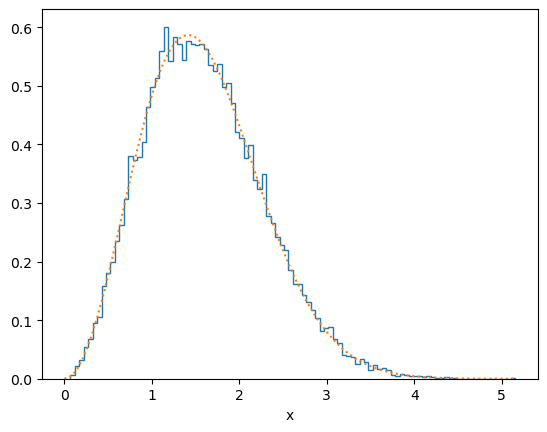

In [12]:
variance = np.sqrt((a**2)*(3*np.pi-8)/np.pi)
maxbol = lambda t: (np.sqrt(2/np.pi))*(t**2)*np.exp(-((t/a)**2)/2)/a**3

def plot_distribution(x, func):
    plt.clf()
    plt.hist(x, density=True, bins=100, histtype = 'step')
    xx = np.linspace(0.0,max(x),100)
    plt.plot(xx, func(xx),':')
#     plt.yscale('log')
#     plt.xscale('log')
    plt.xlabel('x')
    plt.show()

MB =  MaxwellBoltzmann(30000)

plot_distribution(MB, maxbol)

### c)

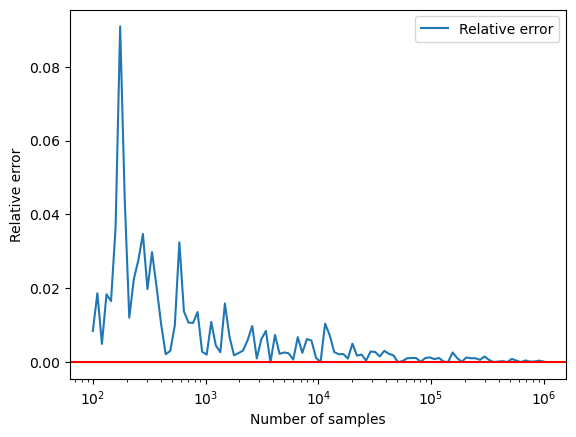

In [28]:
a = 2
kbT_m = a**2

N_values = 10**np.linspace(2,6, 100)
real_average = (8*kbT_m/np.pi)**(1/2)

error = []

for N in N_values:
    MB = MaxwellBoltzmann(int(N))
    average_velocity = np.sum(MB)/len(MB)
    err = abs(average_velocity-real_average)/real_average
    error = np.append(error, err)
        
plt.plot(N_values, error, label = 'Relative error' )
plt.axhline(y = 0.0002, color = 'r', linestyle = '-')
plt.xscale('log')
plt.ylabel('Relative error')
plt.xlabel('Number of samples')
plt.legend()
plt.show()

The error stabilizes around $0.0001$. 
A relatively low value for such a straightforward technique. Certainly, as we acquire more sample points, our results become more precise. This increased precision arises because we are considering a greater number of values from the distribution, bringing the mean closer to its true value. The error decreases as we increase the number of points until it reaches a constant value. It's essential to recognize that this inherent error stems from our limitation in creating a finite number of points to represent the distribution. As a result, our points cannot span the infinite range of the Gaussian distribution. Consequently, no matter how much we increase the number of samples, there will always be values beyond our reach. To address this, we'd need to expand the range of our data points.